# Welcome to the Beginner Python Workshop 

### Topic: Plotting with pandas and matplotlib

This notebook will give you a basic introduction to the Python world. Some of the topics mentioned below is also covered in the [tutorials and tutorial videos](https://github.com/GuckLab/Python-Workshops/tree/main/tutorials)

Eoghan O'Connell, Guck Division, MPL, 2021

In [1]:
# notebook metadata you can ignore!
info = {"workshop": "05",
        "topic": ["plotting", "pandas", "matplotlib",
                  "csv", "iris",],
        "version" : "1.0.0"}

### How to use this notebook

- Click on a cell (each box is called a cell). Hit "shift+enter", this will run the cell!
- You can run the cells in any order!
- The output of runnable code is printed below the cell.
- Check out this [Jupyter Notebook Tutorial video](https://www.youtube.com/watch?v=HW29067qVWk).

See the help tab above for more information!


# What is in this Workshop?
In this notebook we cover:
- How to plot with pandas and matplotlib
   - Simple figures
   - Subfigures, 3D plots

Check out the tutorial video series by Corey Schafer on pandas [here](https://www.youtube.com/watch?v=ZyhVh-qRZPA&list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS).

In [2]:
# import necessary modules
%matplotlib nbagg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## How to plot with pandas and matplotlib

Pandas is a library for handling spreadsheet data, but it also have some powerful plotting tools.

We will plot first with pandas, and then see how to use it with matplotlib.

### Creating simple plots with pandas

In [3]:
# for more info on how to open data with pandas, see the previous notebook!
df = pd.read_csv(r"../../data/iris.csv")

df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<IPython.core.display.Javascript object>


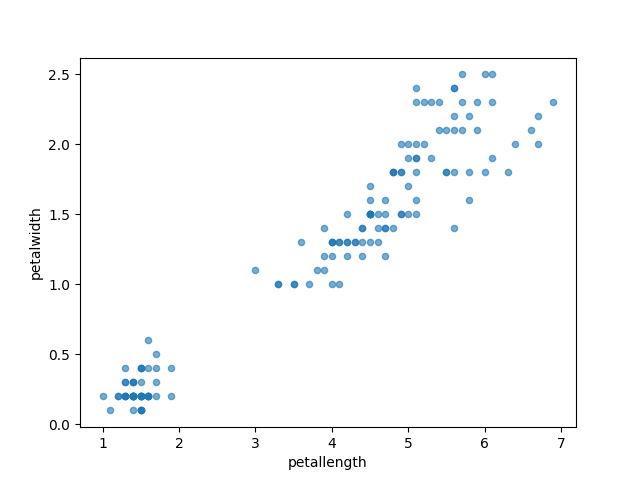

<AxesSubplot: xlabel='petallength', ylabel='petalwidth'>

In [4]:
# plotting with pandas is really easy!

df.plot.scatter(x="petallength", y="petalwidth", alpha=0.6)

<IPython.core.display.Javascript object>


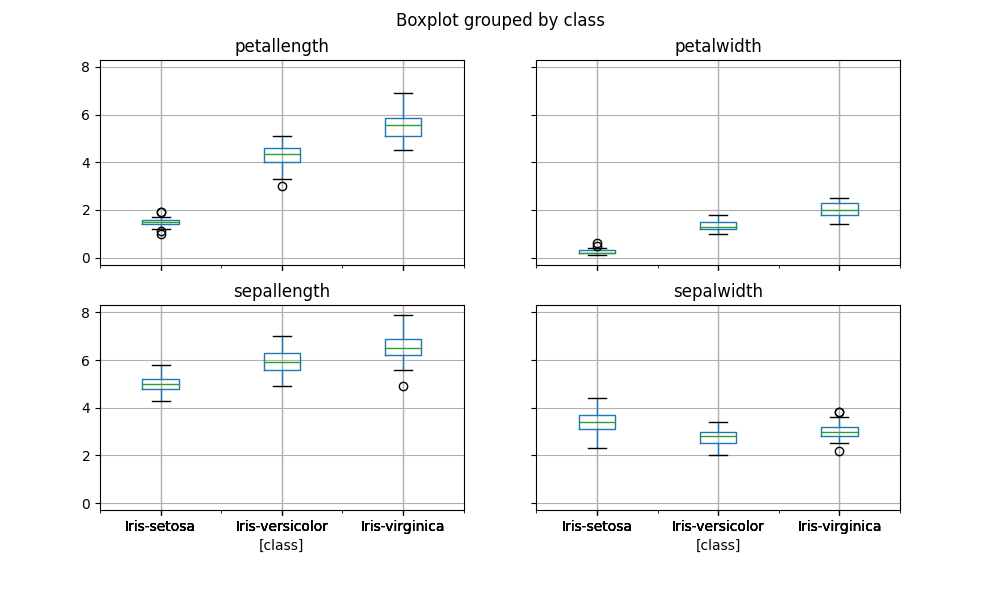

array([[<AxesSubplot: title={'center': 'petallength'}, xlabel='[class]'>,
        <AxesSubplot: title={'center': 'petalwidth'}, xlabel='[class]'>],
       [<AxesSubplot: title={'center': 'sepallength'}, xlabel='[class]'>,
        <AxesSubplot: title={'center': 'sepalwidth'}, xlabel='[class]'>]],
      dtype=object)

In [5]:
# we can look at boxplots

df.boxplot(figsize=(10, 6), by="class")

There are MANY different plots one can use with pandas. See them here: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#other-plots

### Creating simple plots with matplotlib

<IPython.core.display.Javascript object>


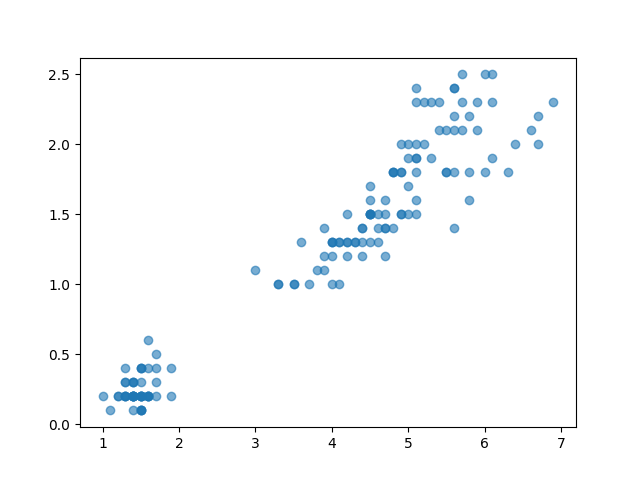

In [6]:
# using matplotlib only, basic plot

x = df["petallength"]
y = df["petalwidth"]

plt.figure()
plt.plot(x, y, linestyle="", marker="o", alpha=0.6)
plt.show()

# notice how certain things are different when compared with the above basic plot from pandas, such as the xy labels

## Pandas and Matplotlib: Plotting together

Notice how we are mixing pandas plotting with matplotlib here.

This is allowed, because pandas plotting is based on matplotlib!

We can use matplotlib to edit the fine details our figure...

<IPython.core.display.Javascript object>


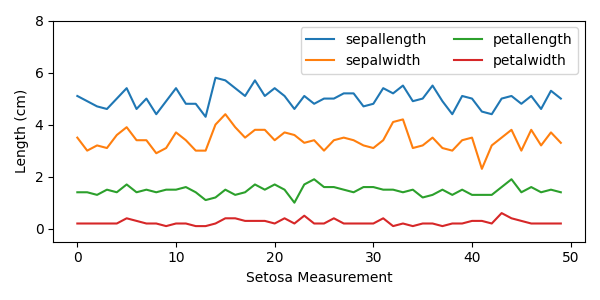

In [7]:
fig, axs = plt.subplots(figsize=(6, 3))

# plot the data with pandas
df[0:50].plot(ax=axs)

# edit the fine details with matplotlib
axs.set_xlabel("Setosa Measurement")
axs.set_ylabel("Length (cm)")

axs.set_ylim((-0.5, 8))
axs.legend(ncol=2, loc="upper right")

plt.tight_layout()
plt.show()
plt.savefig(r"../../data/Iris Setosa measurements.png")

Let's create a plot and annotate the plot with some stats and info...

Again, we are mixing pandas and matplotlib code!

In [8]:
# first get the mean of setosa petalwidth and petallength
setosa_petallength_mean = df[0:50]["petallength"].mean()
setosa_petalwidth_mean = df[0:50]["petalwidth"].mean()

<IPython.core.display.Javascript object>


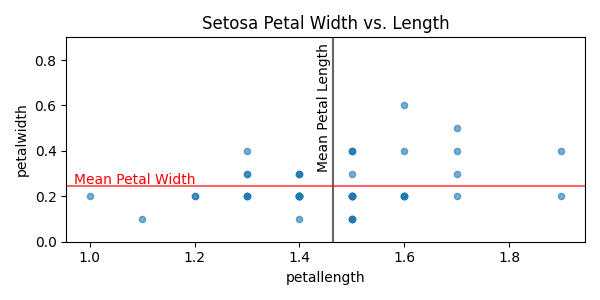

In [9]:
fig, axs = plt.subplots(figsize=(6, 3))
df[0:50].plot.scatter(x="petallength", y="petalwidth", ax=axs, alpha=0.6)

axs.axvline(setosa_petallength_mean, color="black", alpha=0.6)
axs.axhline(setosa_petalwidth_mean, color="red", alpha=0.6)

axs.text(setosa_petallength_mean-0.03, 0.32, "Mean Petal Length", rotation=90)
axs.text(0.97, setosa_petalwidth_mean+0.01, "Mean Petal Width", color="red")

axs.set_ylim((0, 0.9))

axs.set_title("Setosa Petal Width vs. Length")
plt.tight_layout()
plt.show()

#### Managing Subplots with axes

<IPython.core.display.Javascript object>


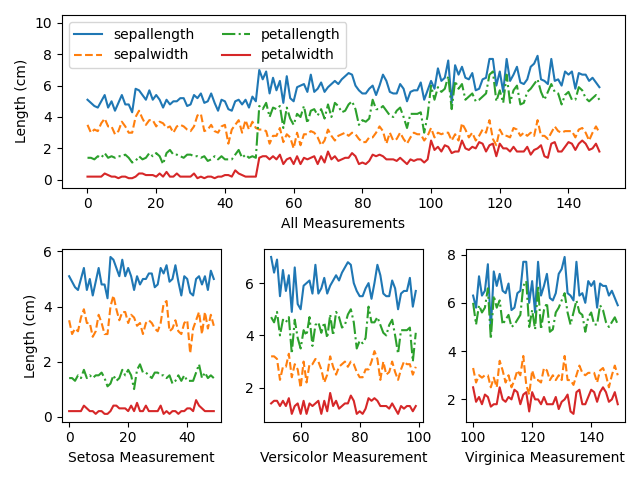

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(234)
ax3 = fig.add_subplot(235)
ax4 = fig.add_subplot(236)

# this would be alternative syntax
# fig, axs = plt.subplots(2, 2)
# ax1, ax2, ax3, ax4 = axs.flatten()


linestyle = ["-", "--", "-.", "-"]

df.plot(ax=ax1, style=linestyle)
df[0:50].plot(ax=ax2, style=linestyle, legend=None)
df[50:100].plot(ax=ax3, style=linestyle, legend=None)
df[100:150].plot(ax=ax4, style=linestyle, legend=None)

ax1.set_xlabel("All Measurements")
ax2.set_xlabel("Setosa Measurement")
ax3.set_xlabel("Versicolor Measurement")
ax4.set_xlabel("Virginica Measurement")

ax1.set_ylabel("Length (cm)")
ax2.set_ylabel("Length (cm)")

ax1.set_ylim((-0.5, 10.5))
ax1.legend(ncol=2, loc="upper left")

plt.tight_layout()
plt.show()

## 3D Plots

<IPython.core.display.Javascript object>


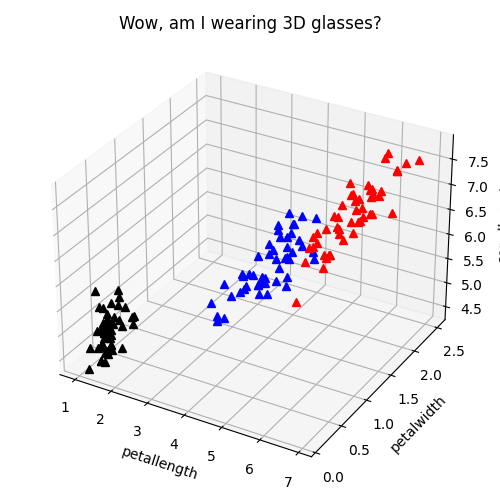

In [11]:
# There is a third dimension???

xlab = "petallength"
ylab = "petalwidth"
zlab = "sepallength"

x = df[xlab]
y = df[ylab]
z = df[zlab]

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')

for (start, stop), color in zip([(0, 50), (50, 100), (100, 150)], ["k", "blue", "red"]):
    ax.plot(xs=x[start:stop], ys=y[start:stop], zs=z[start:stop], color=color, linestyle="", marker="^")

ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
ax.set_zlabel(zlab)
ax.set_title("Wow, am I wearing 3D glasses?")

plt.tight_layout()
plt.show()

You can move the 3D plot around with thr "Pan" button under the plot.

### Next Notebook: Curve fitting

In the next notebook, we will do some curve fitting with scipy or other packages
See the non-linear least-squares curve fitting documentation here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html